Optimization terminated successfully.
         Current function value: 1.145718
         Iterations: 3
         Function evaluations: 44
         Gradient evaluations: 4
[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 7.24399804e-05]
Optimization terminated successfully.
         Current function value: 8.431480
         Iterations: 3
         Function evaluations: 44
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 9.701767
         Iterations: 3
         Function evaluations: 44
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 3.717965
         Iterations: 3
         Function evaluations: 44
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 5.356743
         Iterations: 3
         Function evaluations: 44
         Gradient evaluations

Text(0, 0.5, 'Omega')

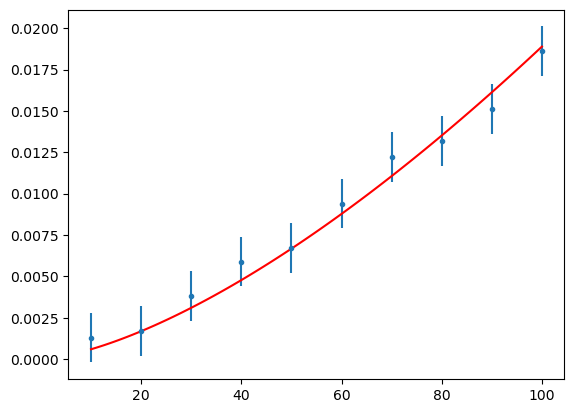

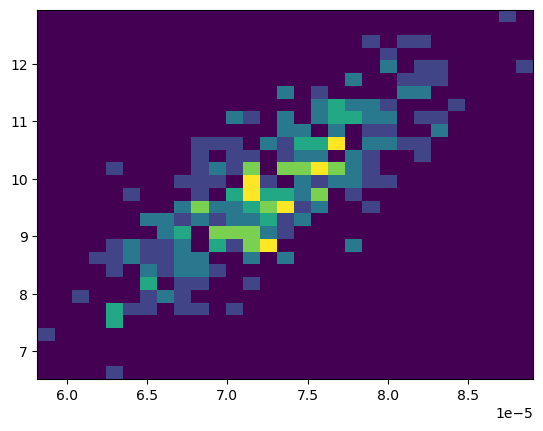

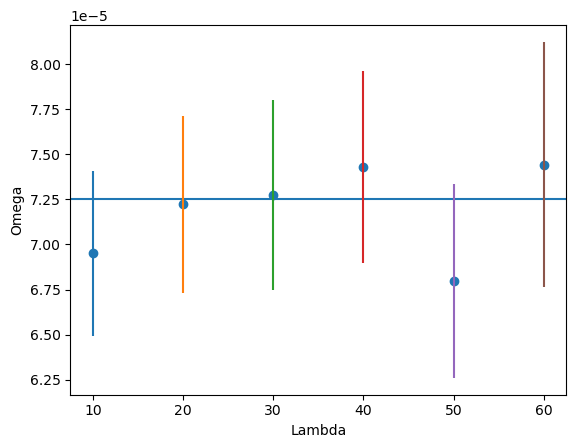

In [3]:
import numpy as np
import pandas as pd
import scipy.optimize as spo
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/DataRotacion.csv")

df30 = df.copy()
df30.drop(df[(df['angle'] != 30)].index, inplace=True)
data = np.array(df30)

h = data[:,0]
lamb = data[:,1]
y_ = data[:,2]
sigmay= data[:,3]
g = 9.81


def y(h, lamb, w, g):
    for n in range(len(w)):
        y = 2*np.sqrt(2)*w[n]*np.cos(lamb*np.pi/180)*np.sqrt((h**3)/g)/3
    return y


def Chi2(w, h, y_, sigmay, lamb, g):
    return np.sum (  (y_ - y(h, lamb, w, g))**2/(2*sigmay**2) )

w0 = np.ones(10)

nll = lambda *w: Chi2(*w)

result = spo.minimize( nll, w0, args=(h, y_, sigmay, lamb, g),options={'disp':True} )
best = result.x
print(best)

_h = np.linspace(np.min(h),np.max(h),100)
ys = y(_h, 30, best, g)
plt.errorbar(h, y_, yerr=sigmay, fmt='.')
plt.plot(_h,ys,color='r')


tabla = {"lambda":  [], "omega": [], "rango": [], "s/w": [] } 

N = 300

gravedad = []
omega = []
for i in range(N):
    g_ = g + np.random.normal(loc=0,scale=1)
    gravedad.append(g_)
    _y_ = y_ + np.random.normal( loc=0, scale=sigmay[0], size=len(y_) )
    result = spo.minimize( nll, w0, args=(h, _y_, sigmay, lamb, g_),options={'disp':True} )
    best_ = result.x
    omega.append(best_[-1])
Gravedad = np.array(gravedad)
Omega = np.array(omega)


H2,xedges,yedges = np.histogram2d(Omega,Gravedad,bins=(29,29))
H2 = H2.T

fig, (ax1) = plt.subplots(ncols=1, sharey=True)
ax1.pcolormesh(xedges, yedges, H2)
ax1.set_xlim(Omega.min(), Omega.max())
ax1.set_ylim(Gravedad.min(), Gravedad.max())

# Si estan correlacionadas, ya que cuando una aumenta, la otra tambien. Tienen correlacionadas positivamente

H1 = np.sum(H2,axis=0)
cs = np.cumsum(H1)
ij = np.searchsorted( cs, np.percentile(cs,16) )
ii = np.searchsorted( cs, np.percentile(cs,50) )
ji = np.searchsorted( cs, np.percentile(cs,84) )
#print(H1)
#print(cs)
#print(ij)
#print(ii)
#print(ji)
mid = np.average(Omega)
sig = np.std(Omega)

tabla["lambda"].append(lamb[-1])
tabla["omega"].append(mid)
tabla["rango"].append([mid-sig, mid+sig])
tabla["s/w"].append(sig/mid)

"----------"

df10 = df.copy()
df10.drop(df[(df['angle'] != 10.0)].index, inplace=True)
data10 = np.array(df10)
h10 = data10[:,0]
lamb10 = data10[:,1]
y_10 = data10[:,2]
sigmay10= data10[:,3]


gravedad10 = []
omega10= []
for i in range(N):
    g_10 = g + np.random.normal(loc=0,scale=1)
    gravedad10.append(g_)
    _y_10 = y_10 + np.random.normal( loc=0, scale=sigmay10[0], size=len(y_10) )
    result = spo.minimize( nll, w0, args=(h10, _y_10, sigmay10, lamb10, g_10),options={'disp':True} )
    best_10 = result.x
    omega10.append(best_10[-1])
Gravedad10 = np.array(gravedad10)
Omega10 = np.array(omega10)
H210,xedges,yedges = np.histogram2d(Omega10,Gravedad10,bins=(29,29))
H210 = H210.T
mid10 = np.average(Omega10)
sig10 = np.std(Omega10)

tabla["lambda"].append(lamb10[-1])
tabla["omega"].append(mid10)
tabla["rango"].append([mid10-sig10, mid10+sig10])
tabla["s/w"].append(sig10/mid10)

"----------"

df20 = df.copy()
df20.drop(df[(df['angle'] != 20.0)].index, inplace=True)
data20 = np.array(df20)
h20 = data20[:,0]
lamb20 = data20[:,1]
y_20 = data20[:,2]
sigmay20= data20[:,3]


gravedad20 = []
omega20= []
for i in range(N):
    g_20 = g + np.random.normal(loc=0,scale=1)
    gravedad20.append(g_20)
    _y_20 = y_20 + np.random.normal( loc=0, scale=sigmay20[0], size=len(y_20) )
    result = spo.minimize( nll, w0, args=(h20, _y_20, sigmay20, lamb20, g_20),options={'disp':True} )
    best_20 = result.x
    omega20.append(best_20[-1])
Gravedad20 = np.array(gravedad20)
Omega20 = np.array(omega20)
H220,xedges,yedges = np.histogram2d(Omega20,Gravedad20,bins=(29,29))
H220 = H220.T
mid20 = np.average(Omega20)
sig20 = np.std(Omega20)

tabla["lambda"].append(lamb20[-1])
tabla["omega"].append(mid20)
tabla["rango"].append([mid20-sig20, mid20+sig20])
tabla["s/w"].append(sig20/mid20)

"----------"

df40 = df.copy()
df40.drop(df[(df['angle'] != 40.0)].index, inplace=True)
data40 = np.array(df40)
h40 = data40[:,0]
lamb40 = data40[:,1]
y_40 = data40[:,2]
sigmay40= data40[:,3]


gravedad40 = []
omega40= []
for i in range(N):
    g_40 = g + np.random.normal(loc=0,scale=1)
    gravedad40.append(g_40)
    _y_40 = y_40 + np.random.normal( loc=0, scale=sigmay40[0], size=len(y_40) )
    result = spo.minimize( nll, w0, args=(h40, _y_40, sigmay40, lamb40, g_40),options={'disp':True} )
    best_40 = result.x
    omega40.append(best_40[-1])
Gravedad40 = np.array(gravedad40)
Omega40 = np.array(omega40)
H240,xedges,yedges = np.histogram2d(Omega40,Gravedad40,bins=(29,29))
H240 = H240.T
mid40 = np.average(Omega40)
sig40 = np.std(Omega40)

tabla["lambda"].append(lamb40[-1])
tabla["omega"].append(mid40)
tabla["rango"].append([mid40-sig40, mid40+sig40])
tabla["s/w"].append(sig40/mid40)

"----------"

df50 = df.copy()
df50.drop(df[(df['angle'] != 50.0)].index, inplace=True)
data50 = np.array(df50)
h50 = data50[:,0]
lamb50 = data50[:,1]
y_50 = data50[:,2]
sigmay50= data50[:,3]


gravedad50 = []
omega50= []
for i in range(N):
    g_50 = g + np.random.normal(loc=0,scale=1)
    gravedad50.append(g_50)
    _y_50 = y_50 + np.random.normal( loc=0, scale=sigmay50[0], size=len(y_50) )
    result = spo.minimize( nll, w0, args=(h50, _y_50, sigmay50, lamb50, g_50),options={'disp':True} )
    best_50 = result.x
    omega50.append(best_50[-1])
Gravedad50 = np.array(gravedad50)
Omega50 = np.array(omega50)
H250,xedges,yedges = np.histogram2d(Omega50,Gravedad50,bins=(29,29))
H250 = H250.T
mid50 = np.average(Omega50)
sig50 = np.std(Omega50)

tabla["lambda"].append(lamb50[-1])
tabla["omega"].append(mid50)
tabla["rango"].append([mid50-sig50, mid50+sig50])
tabla["s/w"].append(sig50/mid50)

"----------"

df60 = df.copy()
df60.drop(df[(df['angle'] != 60.0)].index, inplace=True)
data60 = np.array(df60)
h60 = data60[:,0]
lamb60 = data60[:,1]
y_60 = data60[:,2]
sigmay60= data60[:,3]


gravedad60 = []
omega60= []
for i in range(N):
    g_60 = g + np.random.normal(loc=0,scale=1)
    gravedad60.append(g_60)
    _y_60 = y_60 + np.random.normal( loc=0, scale=sigmay60[0], size=len(y_60) )
    result = spo.minimize( nll, w0, args=(h60, _y_60, sigmay60, lamb60, g_60),options={'disp':True} )
    best_60 = result.x
    omega60.append(best_60[-1])
Gravedad60 = np.array(gravedad60)
Omega60 = np.array(omega60)
H260,xedges,yedges = np.histogram2d(Omega60,Gravedad60,bins=(29,29))
H260 = H260.T
mid60 = np.average(Omega60)
sig60 = np.std(Omega60)

tabla["lambda"].append(lamb60[-1])
tabla["omega"].append(mid60)
tabla["rango"].append([mid60-sig60, mid60+sig60])
tabla["s/w"].append(sig60/mid60)


tablaf = pd.DataFrame(tabla)
print(tablaf)

fig, (ax2) = plt.subplots(ncols=1, sharey=True)

lambd = [tabla["lambda"][1], tabla["lambda"][2], tabla["lambda"][0], tabla["lambda"][3], tabla["lambda"][4], tabla["lambda"][5]]
omega = [tabla["omega"][1], tabla["omega"][2], tabla["omega"][0], tabla["omega"][3], tabla["omega"][4], tabla["omega"][5]]
rangos = [tabla["rango"][1], tabla["rango"][2], tabla["rango"][0], tabla["rango"][3], tabla["rango"][4], tabla["rango"][5]]

ax2.scatter(lambd, omega)
ax2.axhline(y = 7.25*(10**(-5)))
for i in range(len(omega)):
    ax2.errorbar(lambd[i], omega[i], (rangos[i][1] - omega[i]) )
ax2.set_xlabel("Lambda")
ax2.set_ylabel("Omega")